<a href="https://colab.research.google.com/github/KaylumCassidy/FYP/blob/main/Predicting_Wind_Energy_Generation__C20323831_FYP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting wind energy generation to enable transmission system operator (TSO) supply planning.**

This dissertation focuses on using high-frequency short-term weather forecasting to predict wind production in Ireland. The aim is to prepare microgrid control systems for periods of low wind power generation, crucial for stabilizing the country's energy mix. Clear objectives include testing predictive analytical techniques, finding the most accurate model algorithm, determining influential weather variables, and validating against existing models

## Irish weather data

### Import libraries

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import io
import requests

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

from datetime import tzinfo, timedelta, datetime
minDate = "2017-01-01 00:00:00"

In [ ]:
  # This Python 3 environment comes with many helpful analytics libraries installed
  # It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
  # For example, here's several helpful packages to load in

  import numpy as np # linear algebra
  import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

  import io
  import requests

  import plotly.offline as py
  py.init_notebook_mode(connected=True)
  import plotly.graph_objs as go
  from plotly import tools
  import plotly.figure_factory as ff
  from plotly.subplots import make_subplots

  import warnings
  warnings.filterwarnings('ignore')

  import matplotlib.pyplot as plt
  plt.style.use('seaborn-whitegrid')

  from datetime import tzinfo, timedelta, datetime, date

In [ ]:
minDate = "2017-01-01 00:00:00"

### Loading MerEire dataset 2017-2023

This dataset is from MetEire website form 2017-2023 I choose 7 weather station(Dublin Airport, Shannon Airport, Mayo, Donegal, Galway, Cork) each recroding every hour of evvery day. (Dataset colm meaning in photo below)

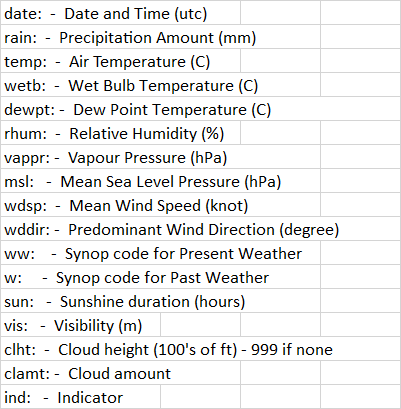![image.png]()

**CORK**

In [ ]:
import pandas as pd
import requests
from io import StringIO

github_raw_url = 'https://raw.githubusercontent.com/KaylumCassidy/FYP/main/CorkAirport.csv'

# Fetch the content of the file
response = requests.get(github_raw_url)
s = response.content

# Read the CSV file into a pandas DataFrame
corkairportds = pd.read_csv(StringIO(s.decode('utf-8')))

# Display the column names
print(corkairportds.columns)

# Convert the 'date' column to datetime format
corkairportds['date'] = pd.to_datetime(corkairportds['date'], format='%d/%m/%Y %H:%M', errors='ignore')

# Fix the 'wdsp' column with space value
corkairportds['wdsp'].replace(to_replace=' ', value=0, inplace=True)
corkairportds['wdsp'] = corkairportds['wdsp'].astype('float32')  # Change to float if necessary

# Replace "your_min_date_here" with an actual minimum date in the correct format
minDate = pd.to_datetime('01/01/2017 00:00', format='%d/%m/%Y %H:%M')  # Adjust the date and format as needed

# Reduce the timeframe
corkairportds = corkairportds[corkairportds['date'] >= minDate]



Index(['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt',
       'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir', 'ww', 'w',
       'sun', 'vis', 'clht', 'clamt'],
      dtype='object')


**Shannon Airport**

In [ ]:
import pandas as pd
import requests
from io import StringIO

github_raw_url = 'https://raw.githubusercontent.com/KaylumCassidy/FYP/main/ShannonAirport.csv'

# Fetch the content of the file
response = requests.get(github_raw_url)
s = response.content

# Read the CSV file into a pandas DataFrame
shannonAirport = pd.read_csv(StringIO(s.decode('utf-8')))

# Display the column names
print(shannonAirport.columns)

# Convert the 'date' column to datetime format
shannonAirport['date'] = pd.to_datetime(shannonAirport['date'], format='%d/%m/%Y %H:%M', errors='ignore')

# Fix the 'wdsp' column with space value
shannonAirport['wdsp'].replace(to_replace=' ', value=0, inplace=True)
shannonAirport['wdsp'] = shannonAirport['wdsp'].astype('float32')  # Change to float if necessary

# Replace "your_min_date_here" with an actual minimum date in the correct format
minDate = pd.to_datetime('01/01/2017 00:00', format='%d/%m/%Y %H:%M')  # Adjust the date and format as needed

# Reduce the timeframe
shannonAirport = shannonAirport[shannonAirport['date'] >= minDate]



Index(['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt',
       'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir', 'ww', 'w',
       'sun', 'vis', 'clht', 'clamt'],
      dtype='object')


**Galway**

In [ ]:
import pandas as pd
import requests
from io import StringIO


github_raw_url = 'https://raw.githubusercontent.com/KaylumCassidy/FYP/main/Galway.csv'

# Fetch the content of the file
response = requests.get(github_raw_url)
s = response.content

# Read the CSV file into a pandas DataFrame
galway = pd.read_csv(StringIO(s.decode('utf-8')))

# Display the column names
print(galway.columns)

# Convert the 'date' column to datetime format
galway['date'] = pd.to_datetime(galway['date'], format='%d/%m/%Y %H:%M', errors='ignore')

# Fix the 'wdsp' column with space value
galway['wdsp'].replace(to_replace=' ', value=0, inplace=True)
galway['wdsp'] = galway['wdsp'].astype('float32')  # Change to float if necessary

# Replace "your_min_date_here" with an actual minimum date in the correct format
minDate = pd.to_datetime('01/01/2017 00:00', format='%d/%m/%Y %H:%M')  # Adjust the date and format as needed

# Reduce the timeframe
galway = galway[galway['date'] >= minDate]



Index(['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt',
       'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir'],
      dtype='object')


**Dublin Airport**

In [ ]:
import pandas as pd
import requests
from io import StringIO

github_raw_url = 'https://raw.githubusercontent.com/KaylumCassidy/FYP/main/DublinAirport.csv'

# Fetch the content of the file
response = requests.get(github_raw_url)
s = response.content

# Read the CSV file into a pandas DataFrame
dublinairportds = pd.read_csv(StringIO(s.decode('utf-8')))

# Display the column names
print(dublinairportds.columns)

# Convert the 'date' column to datetime format
dublinairportds['date'] = pd.to_datetime(dublinairportds['date'], format='%d/%m/%Y %H:%M', errors='ignore')

# Fix the 'wdsp' column with space value
dublinairportds['wdsp'].replace(to_replace=' ', value=0, inplace=True)
dublinairportds['wdsp'] = dublinairportds['wdsp'].astype('float32')  # Change to float if necessary

# Replace "your_min_date_here" with an actual minimum date in the correct format
minDate = pd.to_datetime('01/01/2017 00:00', format='%d/%m/%Y %H:%M')  # Adjust the date and format as needed

# Reduce the timeframe
dublinairportds = dublinairportds[dublinairportds['date'] >= minDate]


Index(['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt',
       'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir', 'ww', 'w',
       'sun', 'vis', 'clht', 'clamt'],
      dtype='object')


In [ ]:
dublinairportds.describe()

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,ww,w,sun,clht,clamt
count,61345.000000,61345.000000,61345.000000,61345.000000,61345.000000,61345.000000,61345.00000,61345.000000,61345.000000,61345.000000,61345.000000,61345.000000,61345.000000,61345.000000,61345.000000,61345.000000,61345.000000,61345.000000,61345.000000
mean,0.493765,0.087166,0.019594,10.113817,0.027614,8.597198,6.93634,10.400083,81.755172,1013.401697,2.000065,9.475866,2.000065,206.367919,14.756769,29.447388,0.169494,286.170055,5.583797
std,0.980092,0.420248,0.138602,5.062082,0.163866,4.457445,4.52180,3.173393,11.991678,12.671529,0.011420,4.681316,0.011420,81.329671,22.707006,26.964605,0.323256,401.147943,2.223360
min,0.000000,0.000000,0.000000,-5.600000,0.000000,-5.900000,-8.90000,3.100000,24.000000,961.800000,2.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,6.600000,0.000000,5.400000,3.60000,7.900000,74.000000,1005.400000,2.000000,6.000000,2.000000,140.000000,2.000000,11.000000,0.000000,24.000000,4.000000
50%,0.000000,0.000000,0.000000,10.100000,0.000000,8.700000,7.10000,10.100000,84.000000,1014.900000,2.000000,9.000000,2.000000,230.000000,2.000000,11.000000,0.000000,50.000000,7.000000
75%,0.000000,0.000000,0.000000,13.700000,0.000000,12.000000,10.20000,12.500000,91.000000,1022.300000,2.000000,12.000000,2.000000,270.000000,21.000000,62.000000,0.100000,250.000000,7.000000
max,3.000000,13.800000,1.000000,29.100000,1.000000,21.400000,19.50000,22.600000,100.000000,1048.200000,4.000000,44.000000,4.000000,360.000000,97.000000,98.000000,1.000000,999.000000,9.000000


**Malin Head(Donengal)**

In [ ]:
import pandas as pd
import requests
from io import StringIO

github_raw_url = 'https://raw.githubusercontent.com/KaylumCassidy/FYP/main/Malin%20Head.csv'

# Fetch the content of the file
response = requests.get(github_raw_url)
s = response.content

# Read the CSV file into a pandas DataFrame
malinHead = pd.read_csv(StringIO(s.decode('utf-8')))

# Display the column names
print(malinHead.columns)

# Convert the 'date' column to datetime format
malinHead['date'] = pd.to_datetime(malinHead['date'], format='%d/%m/%Y %H:%M', errors='ignore')

# Fix the 'wdsp' column with space value
malinHead['wdsp'].replace(to_replace=' ', value=0, inplace=True)
malinHead['wdsp'] = malinHead['wdsp'].astype('float32')  # Change to float if necessary

# Replace "your_min_date_here" with an actual minimum date in the correct format
minDate = pd.to_datetime('01/01/2017 00:00', format='%d/%m/%Y %H:%M')  # Adjust the date and format as needed

# Reduce the timeframe
malinHead = malinHead[malinHead['date'] >= minDate]



Index(['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt',
       'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir'],
      dtype='object')


**BELMULLET**

In [ ]:
import pandas as pd
import requests
from io import StringIO

github_raw_url = 'https://raw.githubusercontent.com/KaylumCassidy/FYP/main/BELMULLET.csv'

# Fetch the content of the file
response = requests.get(github_raw_url)
s = response.content

# Read the CSV file into a pandas DataFrame
belmullet = pd.read_csv(StringIO(s.decode('utf-8')))

# Display the column names
print(belmullet.columns)

# Convert the 'date' column to datetime format
belmullet['date'] = pd.to_datetime(belmullet['date'], format='%d/%m/%Y %H:%M', errors='ignore')

# Fix the 'wdsp' column with space value
belmullet['wdsp'].replace(to_replace=' ', value=0, inplace=True)
belmullet['wdsp'] = belmullet['wdsp'].astype('float32')  # Change to float if necessary

# Replace "your_min_date_here" with an actual minimum date in the correct format
minDate = pd.to_datetime('01/01/2017 00:00', format='%d/%m/%Y %H:%M')  # Adjust the date and format as needed

# Reduce the timeframe
belmullet = belmullet[belmullet['date'] >= minDate]

# Now you can continue with your data analysis or processi

Index(['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt',
       'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir'],
      dtype='object')


### Merge Irish weather Dataset*

In [ ]:
left = belmullet.set_index(['date']).copy()
right = dublinairportds.set_index(['date'])
#right.index = right.index.tz_convert(None)

newdf = left.join(right, lsuffix="_BEL", rsuffix="_DUB")

right = shannonAirport.set_index(['date'])
newdf = newdf.join(right, lsuffix="", rsuffix="_SHA")

right = corkairportds.set_index(['date'])
newdf = newdf.join(right, lsuffix="", rsuffix="_COR")

right = galway.set_index(['date'])
newdf = newdf.join(right, lsuffix="", rsuffix="_GAL")

right = malinHead.set_index(['date'])
newdf = newdf.join(right, lsuffix="", rsuffix="_DON")

newdf = newdf.reset_index()

In [ ]:

newdf.columns

Index(['date', 'ind_BEL', 'rain_BEL', 'ind.1_BEL', 'temp_BEL', 'ind.2_BEL',
       'wetb_BEL', 'dewpt_BEL', 'vappr_BEL', 'rhum_BEL',
       ...
       'ind.2_DON', 'wetb_DON', 'dewpt_DON', 'vappr_DON', 'rhum_DON',
       'msl_DON', 'ind.3_DON', 'wdsp_DON', 'ind.4_DON', 'wddir_DON'],
      dtype='object', length=103)

In [ ]:

newdf

,date,ind_BEL,rain_BEL,ind.1_BEL,temp_BEL,ind.2_BEL,wetb_BEL,dewpt_BEL,vappr_BEL,rhum_BEL,...,ind.2_DON,wetb_DON,dewpt_DON,vappr_DON,rhum_DON,msl_DON,ind.3_DON,wdsp_DON,ind.4_DON,wddir_DON
0,2017-01-01 00:00:00,0,0.0,0,5.2,0,3.9,2.0,7.1,79,...,0,4.3,1.4,6.7,70,1020.6,2,19.0,2,340
1,2017-01-01 01:00:00,0,0.5,0,4.7,0,3.4,1.4,6.8,78,...,0,4.1,2.2,7.2,80,1021.1,2,22.0,2,340
2,2017-01-01 02:00:00,0,0.0,0,5.7,0,3.8,0.7,6.4,70,...,0,4.1,1.0,6.6,69,1021.6,2,24.0,2,350
3,2017-01-01 03:00:00,0,0.4,0,5.6,0,3.3,-0.6,5.9,64,...,0,4.5,1.6,6.8,70,1022.0,2,23.0,2,360
4,2017-01-01 04:00:00,0,0.6,0,4.7,0,3.1,0.5,6.3,74,...,0,4.6,1.7,6.9,71,1022.4,2,27.0,2,360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61340,2023-12-31 20:00:00,0,0.1,0,8.2,0,6.5,4.3,8.3,76,...,0,6.6,5.6,9.1,89,985.0,2,25.0,2,300
61341,2023-12-31 21:00:00,0,0.0,0,7.6,0,5.9,3.7,8.0,76,...,0,6.2,5.2,8.8,88,986.4,2,32.0,2,310
61342,2023-12-31 22:00:00,0,0.0,0,7.5,0,5.9,3.6,7.9,76,...,0,6.6,5.3,8.9,85,988.0,2,27.0,2,320
61343,2023-12-31 23:00:00,0,0.1,0,7.4,0,5.7,3.4,7.8,75,...,0,6.3,4.4,8.4,79,988.7,2,23.0,2,310


In [ ]:
newdf['wdsp_BEL'].describe()

count    61345.000000
mean        11.884114
std          6.536866
min          0.000000
25%          7.000000
50%         11.000000
75%         16.000000
max         45.000000
Name: wdsp_BEL, dtype: float64

In [ ]:

newdf.to_csv("IrelandWeatherData.csv", index=False)

## Eirgrid data

### Import libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import io
import requests


from plotly.offline import iplot
import plotly.graph_objs as go
from plotly import tools
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

from datetime import tzinfo, timedelta, datetime, date

# Any results you write to the current directory are saved as output.

import plotly.express as px
import seaborn as sns

### Data Scraping Eirgrid data

This data was scape form EirGrid Dashbored - https://www.smartgriddashboard.com/#all/wind

**Eirgrid Wind generation**

In [ ]:

#sample_url  = 'https://www.smartgriddashboard.com/DashboardService.svc/data?area=windactual&region=ALL&datefrom=01-Jan-2022+00%3A00&dateto=31-Jan-2023+23%3A59'

sample_url = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ALL&datefrom=01-Jan-2018%2000:00&dateto=31-Jan-2018%2023:59'

url_base = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ALL&datefrom=01-'
url_mid = '%2000:00&dateto='
url_end = '%2023:59'

years = ['2017', '2018', '2019', '2020', '2021']
  #years = ['2020', '2021']
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
endDay= [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
tempds = []
months_years = []

for year in years:
    i = 0
    for month in months:
      # Stop after Aug 2021
      endday = endDay[i]
      if (year == '2021') & (month == 'Oct'):
        break
      elif (year == '2020') & (month == 'Feb'):
        endday = 29

      url = url_base + month + '-' + year + url_mid + str(endday) + '-' + month + '-' + year + url_end
      i = i+1
      print(url)
      s = requests.get(url).content

      mds = pd.read_csv(io.StringIO(s.decode('utf-8')), na_values='-')
      mds['date'] = pd.to_datetime(mds["DATE & TIME"], infer_datetime_format=True, errors='ignore')
      DT = pd.to_datetime(mds["DATE & TIME"], infer_datetime_format=True, errors='ignore').dt
      mds['Year'] = DT.year
      mds['Month'] = DT.strftime('%b')
      mds['DayTime'] = DT.strftime('%d, %R')
      tempds.append(mds)
      months_years.append(month + '-' + year)


wgds = pd.concat(tempds, keys=months_years)

wgds = wgds.reset_index()
wgds = wgds.drop('level_0', axis=1)
wgds = wgds.drop('level_1', axis=1)
wgds = wgds.drop('DATE & TIME', axis=1)



http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ALL&datefrom=01-Jan-2017%2000:00&dateto=31-Jan-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ALL&datefrom=01-Feb-2017%2000:00&dateto=28-Feb-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ALL&datefrom=01-Mar-2017%2000:00&dateto=31-Mar-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ALL&datefrom=01-Apr-2017%2000:00&dateto=30-Apr-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ALL&datefrom=01-May-2017%2000:00&dateto=31-May-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ALL&datefrom=01-Jun-2017%2000:00&dateto=30-Jun-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ALL&datefrom=01-Jul-2017%2000:00&datet

**Eirgrid Actual System Generation**

In [ ]:

  # Wind energy Actual and Prediction
sample_url = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&region=ALL&datefrom=23-Jan-2021%2000:00&dateto=21-Feb-2021%2001:15'

url_base = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&region=ALL&datefrom=01-'

tempds = []
months_years = []

for year in years:
    i = 0
    for month in months:
      # Stop after Feb 2021
      endday = endDay[i]
      if (year == '2021') & (month == 'Oct'):
        break
      elif (year == '2020') & (month == 'Feb'):
        endday = 29

      url = url_base + month + '-' + year + url_mid + str(endday) + '-' + month + '-' + year + url_end
      i = i+1
      print(url)
      s = requests.get(url).content

      mds = pd.read_csv(io.StringIO(s.decode('utf-8')), na_values='-')
      mds['date'] = pd.to_datetime(mds["DATE & TIME"], infer_datetime_format=True, errors='ignore')
      DT = pd.to_datetime(mds["DATE & TIME"], infer_datetime_format=True, errors='ignore').dt
      mds['Year'] = DT.year
      mds['Month'] = DT.strftime('%b')
      mds['DayTime'] = DT.strftime('%d, %R')
      tempds.append(mds)
      months_years.append(month + '-' + year)
      #url = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ALL&datefrom=01-Dec-2020%2000:00&dateto=31-Dec-2020%2023:59'


sgds = pd.concat(tempds, keys=months_years)

sgds = sgds.reset_index()
sgds = sgds.drop('level_0', axis=1)
sgds = sgds.drop('level_1', axis=1)
sgds = sgds.drop('DATE & TIME', axis=1)

http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&region=ALL&datefrom=01-Jan-2017%2000:00&dateto=31-Jan-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&region=ALL&datefrom=01-Feb-2017%2000:00&dateto=28-Feb-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&region=ALL&datefrom=01-Mar-2017%2000:00&dateto=31-Mar-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&region=ALL&datefrom=01-Apr-2017%2000:00&dateto=30-Apr-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&region=ALL&datefrom=01-May-2017%2000:00&dateto=31-May-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&region=ALL&datefrom=01-Jun-2017%2000:00&dateto=30-Jun-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=generationActual&reg

**System Demand: Actual and Prediction**

In [ ]:
  # Demand Actual and Prediction
sample_url = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ALL&datefrom=18-Jan-2021%2000:00&dateto=16-Feb-2021%2023:59'
url_base = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ALL&datefrom=01-'

i = 0
tempds = []

for year in years:
    i = 0
    for month in months:
       # Stop after Feb 2021
      endday = endDay[i]
      if (year == '2021') & (month == 'Oct'):
        break
      elif (year == '2020') & (month == 'Feb'):
        endday = 29
      url = url_base + month + '-' + year + url_mid + str(endday) + '-' + month + '-' + year + url_end
      i = i+1
      print(url)
      s = requests.get(url).content

      mds = pd.read_csv(io.StringIO(s.decode('utf-8')), na_values='-')
      mds['date'] = pd.to_datetime(mds["DATE & TIME"], infer_datetime_format=True, errors='ignore')
      DT = pd.to_datetime(mds["DATE & TIME"], infer_datetime_format=True, errors='ignore').dt
      mds['Year'] = DT.year
      mds['Month'] = DT.strftime('%b')
      mds['DayTime'] = DT.strftime('%d, %R')
      tempds.append(mds)

sdds = pd.concat(tempds, keys=months_years)
sdds = sdds.reset_index()
sdds = sdds.drop('level_0', axis=1)
sdds = sdds.drop('level_1', axis=1)
sdds = sdds.drop('DATE & TIME', axis=1)

http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ALL&datefrom=01-Jan-2017%2000:00&dateto=31-Jan-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ALL&datefrom=01-Feb-2017%2000:00&dateto=28-Feb-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ALL&datefrom=01-Mar-2017%2000:00&dateto=31-Mar-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ALL&datefrom=01-Apr-2017%2000:00&dateto=30-Apr-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ALL&datefrom=01-May-2017%2000:00&dateto=31-May-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ALL&datefrom=01-Jun-2017%2000:00&dateto=30-Jun-2017%2023:59
http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=demandActual&region=ALL&datefrom=01-Jul-2017

KeyError: 'DATE & TIME'

**Merge CSV to have all data based on Date and Region: All Island**

In [ ]:


  # Interconnections Actual and Prediction
sample_url = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=interconnection&region=ALL&datefrom=27-Jan-2021%2000:00&dateto=25-Feb-2021%2022:00'
url_base = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=interconnection&region=ALL&datefrom=01-'

url_mid = '%2000:00&dateto='
url_end = '%2023:59'

tempds = []
months_years = []

i = 0
tempds = []

for year in years:
    i = 0
    for month in months:
      # Stop after Feb 2021
      endday = endDay[i]
      if (year == '2021') & (month == 'Oct'):
        break
      elif (year == '2020') & (month == 'Feb'):
        endday = 29
      url = url_base + month + '-' + year + url_mid + str(endday) + '-' + month + '-' + year + url_end
      i = i+1
      print(url)
      s = requests.get(url).content

      mds = pd.read_csv(io.StringIO(s.decode('utf-8')), na_values='-')
      mds['date'] = pd.to_datetime(mds["DATE & TIME"], infer_datetime_format=True, errors='ignore')
      DT = pd.to_datetime(mds["DATE & TIME"], infer_datetime_format=True, errors='ignore').dt
      mds['Year'] = DT.year
      mds['Month'] = DT.strftime('%b')
      mds['DayTime'] = DT.strftime('%d, %R')
      tempds.append(mds)
      months_years.append(month + '-' + year)

icds = pd.concat(tempds, keys=months_years)
icds = icds.reset_index()
icds = icds.drop('level_0', axis=1)
icds = icds.drop('level_1', axis=1)
icds = icds.drop('DATE & TIME', axis=1)


### Merge all of EirGrid data based on Date

In [ ]:

left = sdds.set_index(['date', 'Year', 'Month', 'DayTime', ' REGION'])
middle = wgds.set_index(['date', 'Year', 'Month', 'DayTime', ' REGION'])
right = sgds.set_index(['date', 'Year', 'Month', 'DayTime', ' REGION'])
  #right.index = right.index.tz_convert(None)

newdf2 = left.join(middle)
newdf2 = newdf.join(right)
newdf2 = newdf.reset_index()

newdf2 = newdf2.rename(columns={' ACTUAL DEMAND(MW)' : 'ActualDemandMW'})
newdf2 = newdf2.rename(columns={'  ACTUAL WIND(MW)' : 'ActualWindMW'})

newdf2 = newdf2.rename(columns={' FORECAST WIND(MW)' : 'ForecastWndMW'})
newdf2 = newdf2.rename(columns={' ACTUAL GENERATION(MW)' : 'ActualGenerationMW'})


  # Region doesn't apply to Interconnections
left = newdf2.set_index(['date', 'Year', 'Month', 'DayTime'])
right = icds.set_index(['date', 'Year', 'Month', 'DayTime'])
newdf2 = left.join(right)
newdf2 = newdf2.reset_index()
newdf2 = newdf2.rename(columns={' NET TOTAL(MW)': 'NetTotal_MW'})
newdf2 = newdf2.rename(columns={' EWIC(MW)': 'EWIC_MW'})
newdf2 = newdf2.rename(columns={' MOYLE(MW)': 'MOYLE_MW'})

newdf2.to_csv("IslandElectricityOnly2017_2020v3.csv")


def settimeatt(row):
    row["hour"] = row.date.hour
    row["isweekday"] = (row.date.isoweekday() < 6)
    row["month"] = row.date.month
    row["year"] = row.date.year
    return row
newdf2 = newdf2.apply(settimeatt, axis='columns')

newdf2.head()

In [ ]:
  #fileP = 'IslandElectricityOnly2017_2020v3.csv'
fileP = 'IslandElectricityOnly2017_2020v3.csv'
newdf2 = pd.read_csv(fileP, parse_dates=[1])

newdf2["hour"] = 0
newdf2["isweekday"] = False
newdf2["month"] = 0
newdf2["year"] = 0

def settimeatt(row):
    row["hour"] = row.date.hour
    row["isweekday"] = (row.date.isoweekday() < 6)
    row["month"] = row.date.month
    row["year"] = row.date.year
    return row
newdf2 = newdf2.apply(settimeatt, axis='columns')

newdf2.head()

In [ ]:
newdf.columns

In [ ]:

# Checking how many months do we have in our dataset (if the year is complete)
newdf.month.unique()

In [ ]:

print('-----------DATA SIZE -------------')
print(newdf.shape)           # 10 Columns, 35044 rows
count_row = newdf.shape[0]   # 10 Columns
count_col = newdf.shape[1]   # 35044 rows
print('Rows: ', count_row, ', Columns: ', count_col)

print('-----------DATA INFO -------------')
print(newdf.info())

print('-----------DATA MAX Values -------------')
newdf.max()

print('-----------DATA COLUMNS-------------')
columns = newdf.columns.values.tolist()
print (columns)

print('-----------BASIC STATISTICS-------------')
newdf.tail()

## Load Weather Data

In [ ]:
import pandas as pd
import requests
from io import StringIO

github_raw_url = 'https://raw.githubusercontent.com/KaylumCassidy/FYP/main/IrelandWeatherData.csv'

# Fetch the content of the file
response = requests.get(github_raw_url)
s = response.content

# Read the CSV file into a pandas DataFrame
weatherData = pd.read_csv(StringIO(s.decode('utf-8')))

# Display the column names
print(weatherData.columns)

weatherds = pd.read_csv("IrelandWeatherData(2).csv", na_values=" ")

weatherds

In [ ]:

weatherds.describe()

In [ ]:
# Reduce timeframe 2017-07-01
cutOffDate = "2021-10-01 14:45:00"
weatherds = weatherds[(weatherds.date >= "2017-07-01 00:00:00") & (weatherds.date < cutOffDate)]

In [ ]:
weatherds.isnull().sum()[0:50]

In [ ]:
weatherds.isnull().sum()[50:120]

In [ ]:
# Backfill a few missing values
weatherds.fillna(method='ffill', limit=3, inplace=True)

## Merge MetEire and EireGrid dataset

In [ ]:
import pandas as pd

# Assuming df_weather is the DataFrame for the new dataset, and it has the datetime column named 'date'
weatherds['date'] = pd.to_datetime(weatherds['date'])

# Set the 'date' column as the index
weatherds.set_index('date', inplace=True)

# Assuming newdf_hourly is the DataFrame from the previous merging and hourly aggregation
newdf['date'] = pd.to_datetime(newdf['date'])
newdf.set_index('date', inplace=True)

# Merge the two DataFrames based on the 'date' column
merged_df = newdf.join(weatherds)

# Reset the index to have a regular 'date' column
merged_df.reset_index(inplace=True)

# Forward fill missing values
merged_df.fillna(method='ffill', inplace=True)

# Save the merged DataFrame to a new CSV file
merged_df.to_csv("MergedIslandData.csv", index=False)

## Change Dataset to hourly not 15 min

converts the 'date' column to datetime format, sets it as the index, resamples the data to an hourly frequency, resets the index, and then prints the head of the resulting DataFrame.

In [ ]:

merged_df['date'] = pd.to_datetime(merged_df['date'])
merged_df = merged_df.set_index('date')

# Resample to hourly frequency
merged_df_hourly = merged_df.resample('H').first()

# Reset the index to get back the 'date' column
merged_df_hourly = merged_df_hourly.reset_index()

# Display the head of the new DataFrame
print(merged_df_hourly.head())

So, the combination of resample('H') and first() effectively downsamples the original DataFrame to hourly intervals, choosing the first data point within each hour.

In [ ]:
# Assuming your new DataFrame is named merged_df_hourly
merged_df_hourly.to_csv("HourlyMergedData.csv", index=False)


Dropping unneeded colms

In [ ]:
# Unused indicator numbers
merged_df_hourly = merged_df_hourly.drop(['ind', 'ind.1', 'ind.2', 'ind.3', 'ind.4'], axis=1)
merged_df_hourly = merged_df_hourly.drop(['ind_BEL', 'ind.1_BEL', 'ind.2_BEL', 'ind.3_BEL', 'ind.4_BEL'], axis=1)
merged_df_hourly = merged_df_hourly.drop(['ind_COR', 'ind.1_COR', 'ind.2_COR', 'ind.3_COR', 'ind.4_COR'], axis=1)
merged_df_hourly = merged_df_hourly.drop(['ind_DUB', 'ind.1_DUB', 'ind.2_DUB', 'ind.3_DUB', 'ind.4_DUB'], axis=1)
merged_df_hourly = merged_df_hourly.drop(['ind_GAL', 'ind.1_GAL', 'ind.2_GAL', 'ind.3_GAL', 'ind.4_GAL'], axis=1)
merged_df_hourly = merged_df_hourly.drop(['ind.2_DON', 'ind.3_DON', 'ind.4_DON'], axis=1)


In [ ]:

merged_df_hourly.head()

In [ ]:
# Assuming your new DataFrame is named merged_df_hourly
merged_df_hourly.to_csv("HourlyMergedData.csv", index=False)

In [ ]:

merged_df_hourly.columns

## Wind capacity

In [ ]:
import pandas as pd

# Assuming the Excel file is uploaded as 'WindInstalledCapacities_MW_Monthly - Sheet1.xlsx'
file_path = 'WindInstalledCapacities_MW_Month.csv'

# Specify the engine as 'openpyxl' for reading Excel files
windcap_df = pd.read_csv(file_path)


# Display the first few rows of the DataFrame
windcap_df.head()


In [ ]:
windcapa_df.tail(10)

In [ ]:
print(windcap_df.columns)


In [ ]:
# Map abbreviated month names to numerical values
month_mapping = {
    'Jan': '01',
    'Feb': '02',
    'Mar': '03',
    'Apr': '04',
    'May': '05',
    'Jun': '06',
    'Jul': '07',
    'Aug': '08',
    'Sep': '09',
    'Oct': '10',
    'Nov': '11',
    'Dec': '12'
}

# Create a new column 'date' by combining 'YYYY' and 'Month' columns
windcap_df['date'] = windcap_df['YYYY'].astype(str) + '-' + windcap_df['Month'].map(month_mapping)

# Display the first few rows of the DataFrame
print(windcap_df.head())


In [ ]:

windcapa_P = '/content/WindInstalledCapacities_MW_Monthly - Sheet1 (1).csv'
windcapa_df = pd.read_csv(windcapa_P, header=3, na_values=['-   ', "  -   "],
                          skipinitialspace=True, thousands=",")

In [ ]:

windcapa_df['day'] = "01-"
windcapa_df['date'] = windcapa_df['day'] + windcapa_df['Month']


In [ ]:
windcapa_df['date'] = pd.to_datetime(windcapa_df['date'].str.replace('.Sept.', '-Sep-', regex=True), format="%d-%b-%Y")

In [ ]:
windcapa_df.rename(columns={'Total.2' : 'TotalWindCapacityMW'}, inplace=True)

## Merge Wind capacity dataset with the hourly dataset

In [ ]:

left = merged_df_hourly.set_index(['date'])
right = windcapa_df[['date', 'TotalWindCapacityMW']].set_index(['date'])
merged_df_hourly_df = left.join(right)



In [ ]:

merged_df_hourly_df['TotalWindCapacityMW'].fillna(method='ffill', inplace=True)
merged_df_hourly_df = merged_df_hourly_df.reset_index()
merged_df_hourly_df.isnull().sum()

In [ ]:

merged_df_hourly_df.to_csv("IslandElectricity2017_2021v4.csv")

In [ ]:
merged_df_hourly_df.columns

## EDA

### Setting up EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# GitHub URL to your CSV file
github_url = 'https://raw.githubusercontent.com/KaylumCassidy/FYP/main/IslandElectricity2017_2021v4.csv'

# Read the CSV file into a Pandas DataFrame
merged_df_hourly_df = pd.read_csv(github_url)

# Display the first few rows of the DataFrame to understand its structure
print(merged_df_hourly_df.head())

*Making Average cols*

In [ ]:
# Calculate average temperature across regions
temperature_columns = ['wdsp_BEL', 'wdsp_DUB', 'wdsp_DON', 'wdsp', 'wdsp_GAL', 'wdsp_COR']
merged_df_hourly_df['average_temp'] = merged_df_hourly_df[temperature_columns].mean(axis=1)

# Calculate average wind speed across regions
wind_speed_columns = ['wdsp_BEL', 'wdsp_DUB', 'wdsp_DON', 'wdsp', 'wdsp_GAL', 'wdsp_COR']
merged_df_hourly_df['average_wind_speed'] = merged_df_hourly_df[wind_speed_columns].mean(axis=1)


# Calculate average wind speed across regions
wind_dir_columns = ['wddir_BEL', 'wddir_DUB', 'wddir_DON', 'wddir', 'wddir_GAL', 'wddir_DON']
merged_df_hourly_df['average_wind_dir'] = merged_df_hourly_df[wind_dir_columns].mean(axis=1)

merged_df_hourly_df.tail()

*Making fuction do get wind direction in word e.g. north,west,east and south*

In [ ]:
def round_wind_direction(direction):
    """
    Round wind direction to cardinal directions.

    Parameters:
    - direction (float): Wind direction in degrees.

    Returns:
    - str: Rounded cardinal direction.
    """
    if direction is None or pd.isnull(direction):
        return 'Unknown'

    # Define directional ranges
    directions = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW', 'N']

    # Convert the wind direction to degrees
    direction_degrees = float(direction)

    # Calculate the index based on the direction
    index = round((direction_degrees % 360) / 45)

    # Return the corresponding cardinal direction
    return directions[index]

# Example usage:
merged_df_hourly_df['rounded_wind_direction'] = merged_df_hourly_df['average_wind_dir'].apply(round_wind_direction)

In [ ]:
# Check the available columns in the DataFrame
print("Available Columns:")
print(merged_df_hourly_df.columns)

In [ ]:
merged_df_hourly_df.head()

In [ ]:
merged_df_hourly_df.to_csv("IslandElectricity2017_2021v5.csv")

### Summary stats

In [ ]:

columns_of_interest = ['date', 'Unnamed: 0', 'Year', 'Month', 'DayTime',
       ' REGION', 'ActualDemandMW', ' FORECAST DEMAND(MW)', 'ForecastWndMW',
       'ActualWindMW', 'ActualGenerationMW', 'NetTotal_MW', 'EWIC_MW',
       'MOYLE_MW', 'hour', 'isweekday', 'month', 'year', 'rain_BEL',
       'temp_BEL', 'wetb_BEL', 'dewpt_BEL', 'vappr_BEL', 'rhum_BEL', 'msl_BEL',
       'wdsp_BEL', 'wddir_BEL', 'rain_DUB', 'temp_DUB', 'wetb_DUB',
       'dewpt_DUB', 'vappr_DUB', 'rhum_DUB', 'msl_DUB', 'wdsp_DUB',
       'wddir_DUB', 'ww', 'w', 'sun', 'vis', 'clht', 'clamt', 'rain', 'temp',
       'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'wdsp', 'wddir', 'ww_SHA',
       'w_SHA', 'sun_SHA', 'vis_SHA', 'clht_SHA', 'clamt_SHA', 'rain_COR',
       'temp_COR', 'wetb_COR', 'dewpt_COR', 'vappr_COR', 'rhum_COR', 'msl_COR',
       'wdsp_COR', 'wddir_COR', 'rain_GAL', 'temp_GAL', 'wetb_GAL',
       'dewpt_GAL', 'vappr_GAL', 'rhum_GAL', 'msl_GAL', 'wdsp_GAL',
       'wddir_GAL', 'ind_DON', 'rain_DON', 'ind.1_DON', 'temp_DON', 'wetb_DON',
       'dewpt_DON', 'vappr_DON', 'rhum_DON', 'msl_DON', 'wdsp_DON',
       'wddir_DON', 'TotalWindCapacityMW', 'average_temp',
       'average_wind_speed', 'average_wind_dir', 'rounded_wind_direction']

# Create a subset of the dataframe with selected columns
subset_df = merged_df_hourly_df[columns_of_interest]

# Display summary statistics
summary_stats = subset_df.describe()
print("Summary Statistics:\n", summary_stats)

### Scatter

In [ ]:

import plotly.express as px

fig = px.scatter(merged_df_hourly_df, x='date', y='ActualDemandMW')
fig.show()


In [ ]:
fig2 = px.scatter(merged_df_hourly_df, x='hour', y='ActualDemandMW', color='month')
fig2.show()


### LinePlot

In [ ]:
# Line plot for Actual Demand and Forecast Demand over Years
plt.figure(figsize=(14, 6))
sns.lineplot(x='Year', y='ForecastWndMW', data=merged_df_hourly_df, label='Actual Demand', color='blue')
sns.lineplot(x='Year', y='ActualWindMW', data=merged_df_hourly_df, label='Forecast Demand', color='orange')
plt.xlabel('Year')
plt.ylabel('Demand (MW)')
plt.title('Actual vs Forecast Demand Over Years')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='Year', y='TotalWindCapacityMW', data=merged_df_hourly_df, color='green')
plt.xlabel('Date')
plt.ylabel('Total Wind Capacity (MW)')
plt.title('Total Wind Capacity Over Time')
plt.show()


### Box Plot

In [ ]:
# Box plot of Actual Wind Energy Generation by Month
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='ActualWindMW', data=merged_df_hourly_df, palette='viridis')
plt.xlabel('Month')
plt.ylabel('Actual Wind Energy Generation (MW)')
plt.title('Box Plot of Actual Wind Energy Generation by Month')
plt.show()

In [ ]:
# Box plot of Actual Wind Energy Generation by Hour of the Day
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='ActualWindMW', data=merged_df_hourly_df, palette='muted')
plt.xlabel('Hour of the Day')
plt.ylabel('Actual Wind Energy Generation (MW)')
plt.title('Box Plot of Actual Wind Energy Generation by Hour of the Day')
plt.show()

In [ ]:
# Box plot of average_wind_speed Generation by Hour of the Day
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='average_wind_speed', data=merged_df_hourly_df, palette='muted')
plt.xlabel('Hour of the Day')
plt.ylabel('Aaverage wind speed eveyr hour')
plt.title('Box Plot of Actual Wind Energy Generation by Hour of the Day')
plt.show()

### BarChart

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'windsp_BEL' and 'windsp_DUB' are the columns for wind speed in BEL and DUB regions
# Replace these with the actual column names if they are different

# Create a bar chart for average wind speed in BEL and DUB regions
plt.figure(figsize=(10, 6))
sns.barplot(x=['BEL', 'DUB'], y=[merged_df_hourly_df['wdsp_BEL'].mean(), merged_df_hourly_df['wdsp_DUB'].mean()], palette="viridis")
plt.title('Average Wind Speed in BEL and DUB Regions')
plt.xlabel('Region')
plt.ylabel('Average Wind Speed (kt)')
plt.show()


### HeatMap

### Violinplot

In [ ]:
# Violin plot for Actual Wind Energy Generation by weekday
plt.figure(figsize=(12, 6))
sns.violinplot(x='isweekday', y='ActualWindMW', data=merged_df_hourly_df, palette='Set2')
plt.xlabel('Weekday (1: Yes, 0: No)')
plt.ylabel('Actual Wind Energy Generation (MW)')
plt.title('Violin Plot of Actual Wind Energy Generation by Weekday')
plt.show()